In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from scipy.special import erf
from pylab import rcParams
from datetime import datetime
## 위경도를 이용해 거리측정
from haversine import haversine

mpl.rc('font', family='Malgun Gothic')

In [2]:
df1 = pd.read_excel("D:/202202edu/aiWork/data/통합데이터용/분석용/(분석)닭전염병과폐사체의일수와거리차이.xlsx", sheet_name='Sheet1')
df1.head()

,감염발생일자,가축전염병명,감염시도,감염시군구,감염읍면동,감염농장소재지,감염축종,감염발생유무,감염발생두수,감염위도,...,시도(폐),시군구(폐),읍면동(폐),상세주소(폐),개체구분(폐),페사관측지코드,페사체위도,페사체경도,거리차이(Km),일수차이
0,2020-11-28,고병원성조류인플루엔자,전라북도,정읍시,소성면,전라북도 정읍시 소성면 기린리,오리-육용오리,1,1,35.566884,...,경상남도,창원시 의창구,대산면,경상남도 창원시 의창구 대산면,폐사체,24,35.315752,128.680597,175.408157,-34
1,2020-11-28,고병원성조류인플루엔자,전라북도,정읍시,소성면,전라북도 정읍시 소성면 기린리,오리-육용오리,1,1,35.566884,...,경상남도,창원시 의창구,동읍,경상남도 창원시 의창구 동읍,폐사체,24,35.310149,128.668833,174.462896,-41
2,2020-11-28,고병원성조류인플루엔자,전라북도,정읍시,소성면,전라북도 정읍시 소성면 기린리,오리-육용오리,1,1,35.566884,...,경상북도,구미시,지산동,경상북도 구미시 지산동,폐사체,34,36.132744,128.355170,156.191608,-42
3,2020-11-28,고병원성조류인플루엔자,전라북도,정읍시,소성면,전라북도 정읍시 소성면 기린리,오리-육용오리,1,1,35.566884,...,제주특별자치도,제주시,구좌읍,제주특별자치도 제주시 구좌읍,분변,82,33.505418,126.891848,229.500739,-44
4,2020-11-28,고병원성조류인플루엔자,전라북도,정읍시,소성면,전라북도 정읍시 소성면 기린리,오리-육용오리,1,1,35.566884,...,경상남도,거창군,거창읍,경상남도 거창군 거창읍,폐사체,20,35.694956,127.910711,104.162142,-44


In [3]:
df1.describe()

,감염발생유무,감염발생두수,감염위도,감염경도,페사관측지코드,페사체위도,페사체경도,거리차이(Km),일수차이
count,32060.0,32060.0,32060.000000,32060.000000,32060.000000,32060.000000,32060.000000,32060.000000,32060.000000
mean,1.0,1.0,36.207407,127.231209,28.611354,37.170686,127.562087,201.678022,5.045446
std,0.0,0.0,1.031282,0.587662,26.936250,1.296692,0.662411,109.088447,139.746489
min,1.0,1.0,33.358632,126.306240,5.000000,33.238766,126.228833,0.000000,-389.000000
25%,1.0,1.0,35.206366,126.722543,10.000000,36.132744,127.186036,125.380491,-43.000000
50%,1.0,1.0,36.558778,127.166218,11.000000,37.729075,127.295145,174.936005,-17.000000
75%,1.0,1.0,37.076953,127.546032,48.000000,38.273103,128.351878,292.920443,15.000000
max,1.0,1.0,38.007864,129.373334,94.000000,38.341111,128.991409,588.534254,361.000000


C:\Users\SUSER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


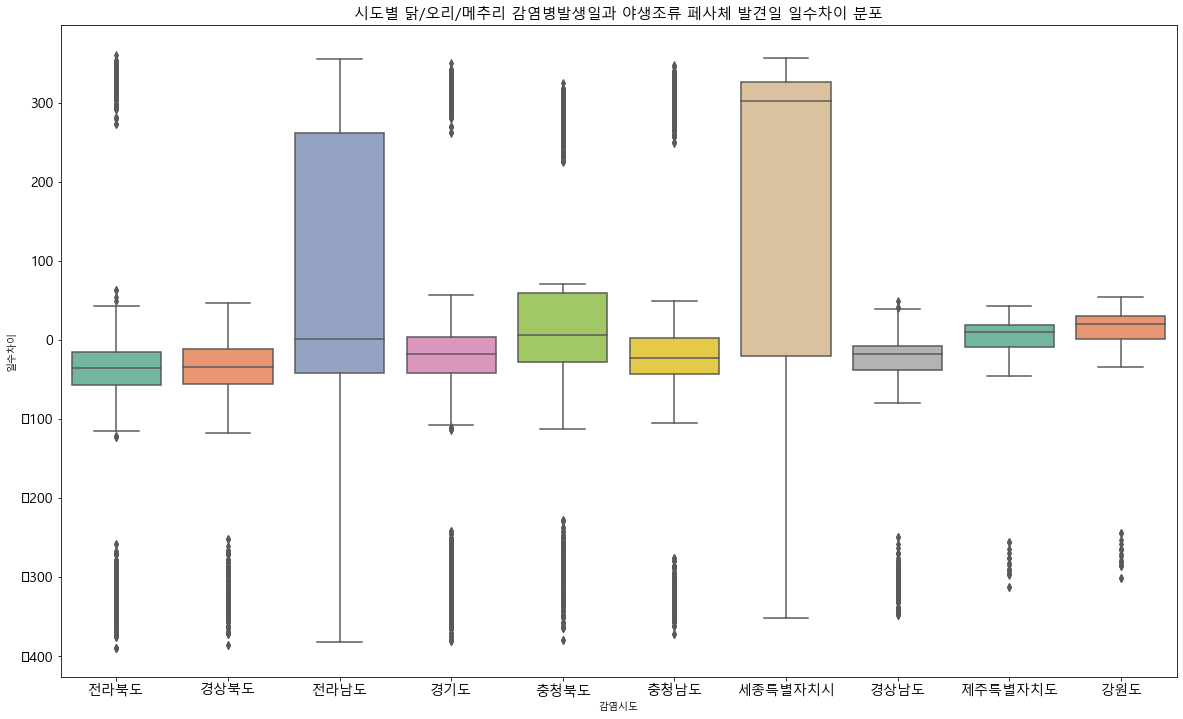

In [4]:
plt.figure(figsize = (20,12))
bx = sns.boxplot(x='감염시도', y= '일수차이',data=df1,palette='Set2')
plt.title('시도별 닭/오리/메추리 감염병발생일과 야생조류 페사체 발견일 일수차이 분포', size=15)
plt.tick_params(axis='x',labelsize=14)
plt.tick_params(axis='y', labelsize=14)
plt.show()

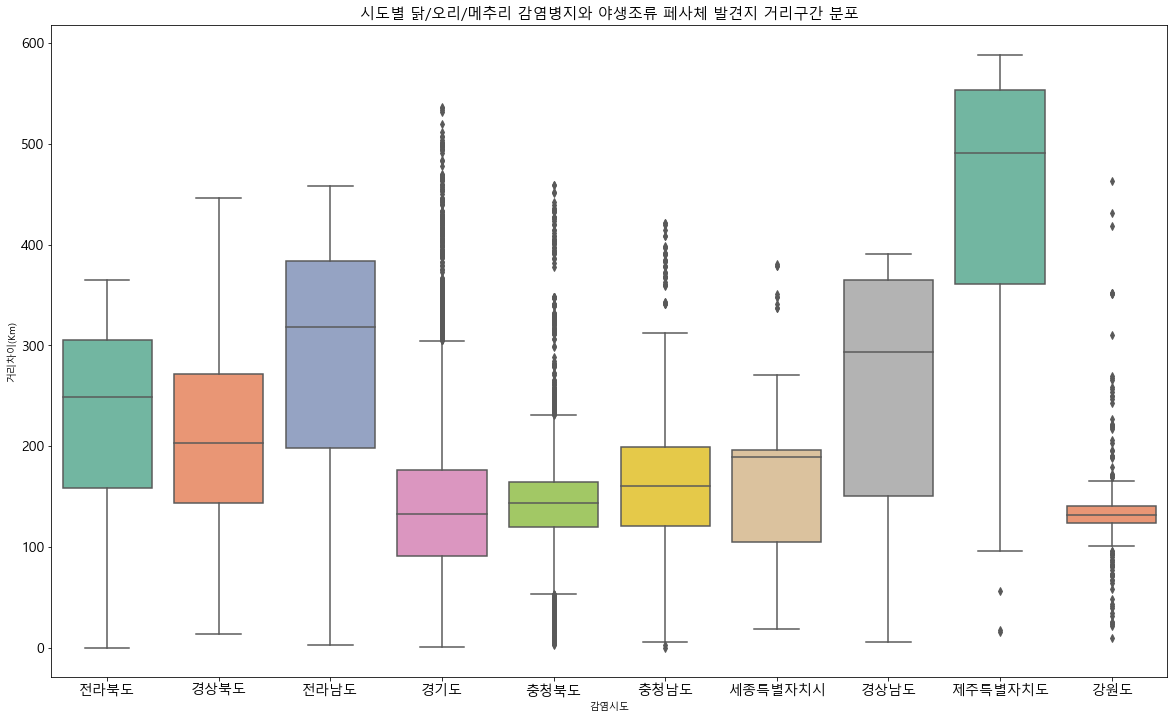

In [5]:
plt.figure(figsize = (20,12))
bx = sns.boxplot(x='감염시도', y= '거리차이(Km)',data=df1,palette='Set2')
plt.title('시도별 닭/오리/메추리 감염병지와 야생조류 페사체 발견지 거리구간 분포', size=15)
plt.tick_params(axis='x',labelsize=14)
plt.tick_params(axis='y', labelsize=14)
plt.show()

In [6]:
df2=df1[(df1['일수차이']>=-99) & (df1['일수차이']<=99)]
df3=df2[(df2['거리차이(Km)']>=0) & (df2['거리차이(Km)']<=400)]

In [8]:
df3.describe()

,감염발생유무,감염발생두수,감염위도,감염경도,페사관측지코드,페사체위도,페사체경도,거리차이(Km),일수차이
count,25002.0,25002.0,25002.000000,25002.000000,25002.000000,25002.000000,25002.000000,25002.000000,25002.000000
mean,1.0,1.0,36.282162,127.283537,26.647588,37.250781,127.570184,194.697504,-18.667707
std,0.0,0.0,0.994302,0.601927,25.595447,1.253688,0.640147,101.449338,31.984505
min,1.0,1.0,33.358632,126.306240,5.000000,33.238766,126.228833,0.000000,-99.000000
25%,1.0,1.0,35.283920,126.789596,10.000000,36.135751,127.238232,124.375609,-41.000000
50%,1.0,1.0,36.575779,127.205708,10.000000,37.968603,127.295145,168.889947,-20.000000
75%,1.0,1.0,37.099020,127.579624,34.000000,38.273103,128.351878,277.608349,1.000000
max,1.0,1.0,38.007864,129.373334,94.000000,38.341111,128.991409,399.912705,96.000000


C:\Users\SUSER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\SUSER\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='일수차이', ylabel='Density'>

C:\Users\SUSER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


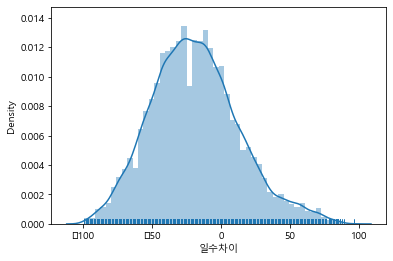

In [17]:
##plt.hist(df3, color = 'green', alpha = 0.2, bins = 50, range='일수차이', label='일수차이', density='True')
## plt.legend()
## plt.show()
sns.distplot(df3['일수차이'], bins= 50, rug=True)

<AxesSubplot:title={'center':'시도별 일수차이 분포'}, xlabel='감염시도', ylabel='일수차이'>

C:\Users\SUSER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


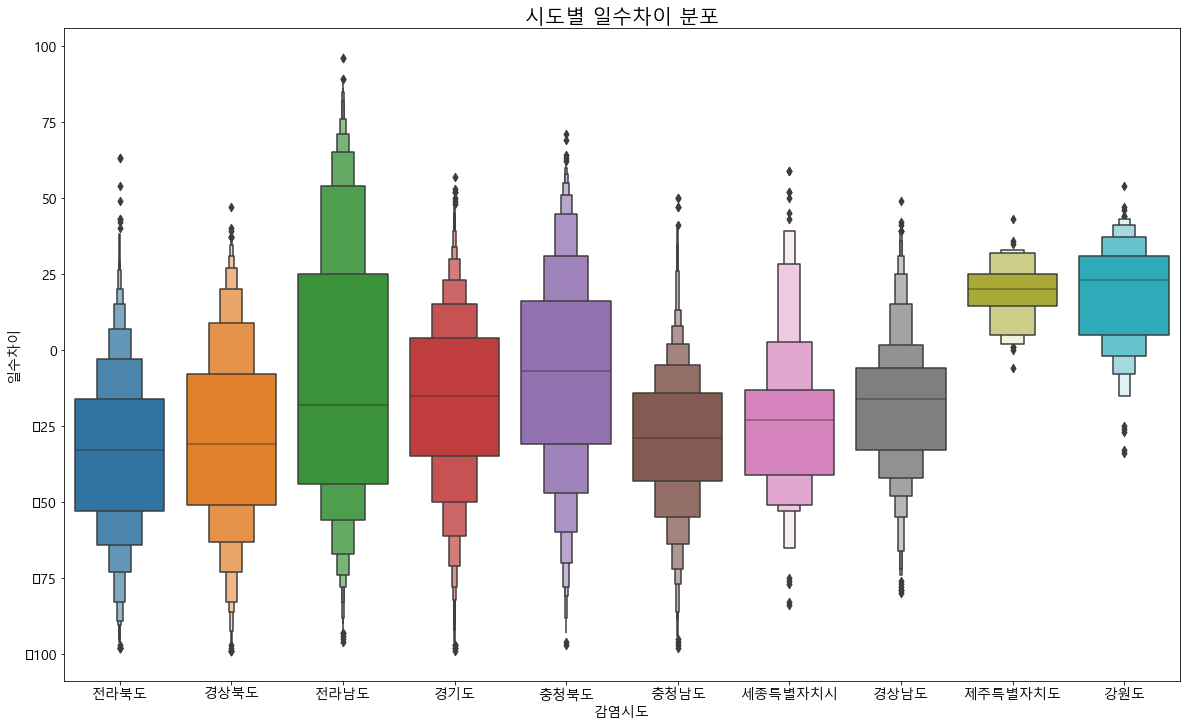

In [22]:
plt.figure(figsize = (20,12))
plt.tick_params(axis='x',labelsize=14)
plt.tick_params(axis='y', labelsize=14)
plt.title('시도별 일수차이 분포', fontsize=20)
plt.xlabel('감염시도', fontsize=14)
plt.ylabel('일수차이', fontsize=14)
sns.boxenplot(x='감염시도',y='일수차이', data=df3)

C:\Users\SUSER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\SUSER\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='거리차이(Km)', ylabel='Density'>

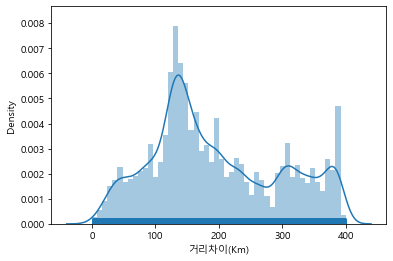

In [23]:
sns.distplot(df3['거리차이(Km)'], bins= 50, rug=True)

In [27]:
## df4=df3[(df3['감염시도']=='경기도') | (df3['감염시도']=='전라남도')]
df4=df3[(df3['감염시도']=='경기도')]

C:\Users\SUSER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\SUSER\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='거리차이(Km)', ylabel='Density'>

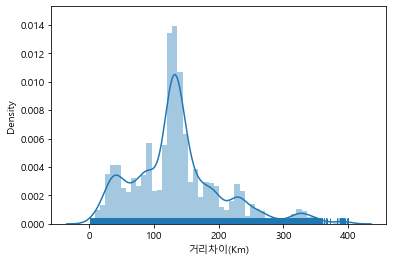

In [29]:
sns.distplot(df4['거리차이(Km)'], bins= 50, rug=True)

<AxesSubplot:xlabel='일수차이', ylabel='거리차이(Km)'>

C:\Users\SUSER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


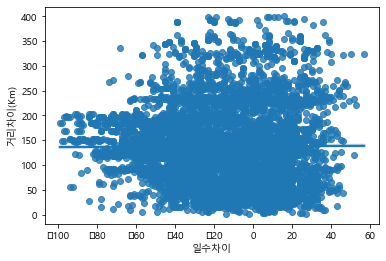

In [32]:
sns.regplot(x='일수차이', y='거리차이(Km)', data=df4)

In [34]:
corr1= df4.corr(method='pearson')
corr1

,감염발생유무,감염발생두수,감염위도,감염경도,페사관측지코드,페사체위도,페사체경도,거리차이(Km),일수차이
감염발생유무,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
감염발생두수,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
감염위도,NaN,NaN,1.000000,-0.376532,-0.009810,0.018839,0.010545,-0.071887,-0.016154
감염경도,NaN,NaN,-0.376532,1.000000,-0.003084,0.002246,0.000464,-0.075339,0.168559
페사관측지코드,NaN,NaN,-0.009810,-0.003084,1.000000,-0.670956,-0.212541,0.217140,0.279680
페사체위도,NaN,NaN,0.018839,0.002246,-0.670956,1.000000,-0.150632,-0.613021,-0.316666
페사체경도,NaN,NaN,0.010545,0.000464,-0.212541,-0.150632,1.000000,0.369001,-0.111501
거리차이(Km),NaN,NaN,-0.071887,-0.075339,0.217140,-0.613021,0.369001,1.000000,0.006329
일수차이,NaN,NaN,-0.016154,0.168559,0.279680,-0.316666,-0.111501,0.006329,1.000000


In [40]:
df5= df4.loc[:,['감염발생일자','감염축종','채취일자(폐)','거리차이(Km)','일수차이']]

C:\Users\SUSER\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


<Figure size 1440x1440 with 0 Axes>

C:\Users\SUSER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


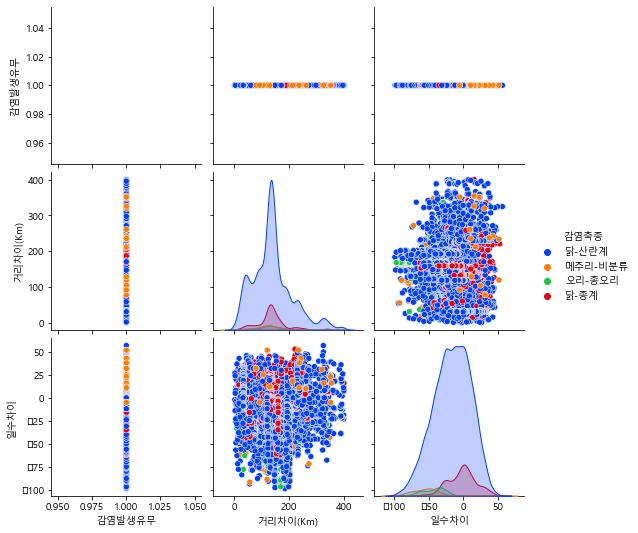

In [43]:
plt.figure(figsize = (20,20))
sns.pairplot(df5, diag_kind='kde',
            hue="감염축종",
            palette='bright')
plt.show()

In [45]:
df5.head(10)

,감염발생일자,감염축종,감염발생유무,채취일자(폐),거리차이(Km),일수차이
916,2020-12-07,닭-산란계,1,2021-01-01,230.640303,-25
917,2020-12-07,닭-산란계,1,2021-01-08,230.750571,-32
918,2020-12-07,닭-산란계,1,2021-01-09,136.540906,-33
920,2020-12-07,닭-산란계,1,2021-01-11,168.597453,-35
921,2020-12-07,닭-산란계,1,2021-01-11,173.459265,-35
922,2020-12-07,닭-산란계,1,2021-01-12,227.484903,-36
923,2020-12-07,닭-산란계,1,2021-01-12,81.879529,-36
924,2020-12-07,닭-산란계,1,2021-01-12,179.710644,-36
925,2020-12-07,닭-산란계,1,2021-01-12,57.919765,-36
926,2020-12-07,닭-산란계,1,2021-01-13,115.839698,-37


In [46]:
df6=df5[(df5['일수차이']>=-15)]

C:\Users\SUSER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\SUSER\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='일수차이', ylabel='Density'>

C:\Users\SUSER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


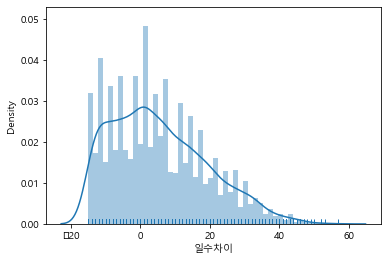

In [48]:
sns.distplot(df6['일수차이'], bins= 50, rug=True)

In [51]:
stats.stats.kendalltau(df6['일수차이'], df6['거리차이(Km)']).correlation

-0.0002829386390142104

In [52]:
stats.stats.pearsonr(df6['일수차이'], df6['거리차이(Km)'])

(0.03781323076067578, 0.015102604781661266)

In [53]:
corr1= df6.corr(method='pearson')
corr1

,감염발생유무,거리차이(Km),일수차이
감염발생유무,NaN,NaN,NaN
거리차이(Km),NaN,1.000000,0.037813
일수차이,NaN,0.037813,1.000000


In [54]:
np.cov(df6['일수차이'], df6['거리차이(Km)'])[0, 1]

40.93732160909813

In [55]:
np.cov(df6['일수차이'], df6['거리차이(Km)'])

array([[ 188.23503917,   40.93732161],
       [  40.93732161, 6226.59775648]])

C:\Users\SUSER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


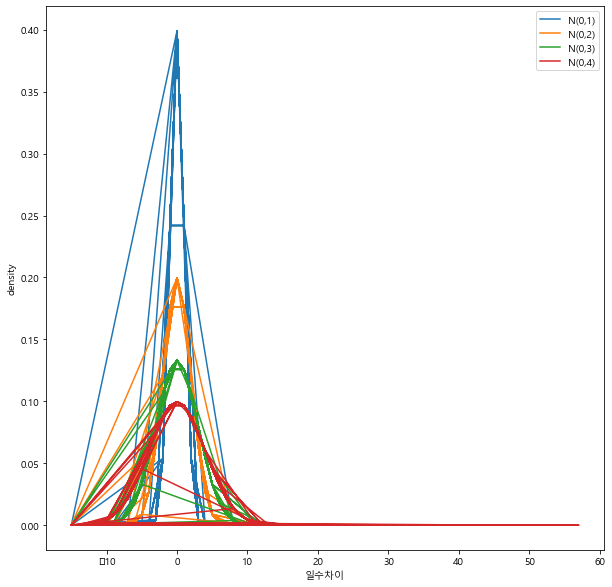

In [61]:
plt.figure(figsize = (10,10))
x = df6['일수차이']
# gaussian distribution function
def gaussian(x, mean, sigma):
    return(1/np.sqrt(2*np.pi*sigma**2)) * np.exp(- (x-mean)**2 / (2*sigma**2))
legend = []
for i in range(1,5):
    legend.append(f'N(0,{i})')
    plt.plot(x,gaussian(x,0,i))
plt.xlabel('일수차이')
plt.ylabel('density')
plt.legend(legend)
plt.show()